**Datasets and Dataloaders**

---

*Datasets from PyTorch*

In [21]:
# Import the necessary packages
import torch
import numpy as np

from torch.utils.data import Dataset
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision import transforms
from matplotlib import pyplot as plt

In [13]:
# Tensors can be put directly into a TensorDataset
X = torch.randn(5,3)
y = torch.randn(5)

mydataset1 = TensorDataset(X,y)

print(mydataset1)
print(mydataset1[0])

(tensor([0.5223, 1.3973, 0.4766]), tensor(-1.2936))


In [14]:
# Tensors can also be put into a Dataset subclass
X = torch.randn(5,3)
y = torch.randn(5)

# The subclass needs at least the following methods
class MyDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

mydataset2 = MyDataset(X,y)

print(mydataset2)
print(mydataset2[0])

(tensor([ 0.2981,  0.8038, -1.2342]), tensor(-0.1739))


In [20]:
# It is possible to add a transform to a dataset

# Let's suppose the input is numpy array
X = np.random.rand(5,3)
y = np.random.rand(5,1)

# This time, we add the transform attribute as well
class MyDataset(Dataset):
    def __init__(self,x,y,transform=None):
        self.x = x
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, index):
        # Get a sample from input. It is numpy array.
        X0 = self.x[index]
        # Get a sample from target, and convert to tensor
        y0 = torch.Tensor(y[index])

        # If there is apply it
        if self.transform is not None:
            X0 = self.transform(X0)
        else:
            X0 = torch.Tensor(X0)   # convert to tensor
            
        return X0, y0


# Create a transform
transform1 = lambda y: torch.Tensor(y)

mydataset3 = MyDataset(X,y,transform1)

print(mydataset3)
print(mydataset3[0])

(tensor([0.3547, 0.4014, 0.6834]), tensor([0.7663]))


In [36]:
# DataLoader objects help to iterate over the input
#dataset = torch.arange(6)
dataset = ['file1','file2','file3','file4','file5','file6']

data_loader1 = DataLoader(dataset)

# You can iterate of the dataset
for item in data_loader1:
    print(item)


print('You can enumerate')
for idx, item in enumerate(data_loader1):
    print(idx)
    print(item)

print('You can set batch size and shuffle')
data_loader2 = DataLoader(dataset,batch_size=2,shuffle=True)
for idx, item in enumerate(data_loader2):
    print(idx)
    print(item)


# Also, to a sample
#print(next(iter(data_loader)))
 

['file1']
['file2']
['file3']
['file4']
['file5']
['file6']
You can enumerate
0
['file1']
1
['file2']
2
['file3']
3
['file4']
4
['file5']
5
['file6']
You can set batch size and shuffle
0
['file2', 'file6']
1
['file5', 'file3']
2
['file4', 'file1']


In [41]:
# Imagine you have a set of image (names) and target values. you can create a dataset using Dataset module
X = ['file1','file2','file3','file4','file5','file6'] 
y = ['cat','cat','dog','dog','dog','cat']

# The subclass needs at least the following methods
class MyDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

mydataset4 = MyDataset(X,y)

data_loader4 = DataLoader(mydataset4,batch_size=2,shuffle=True)
for filename, target in data_loader4:
    print(filename)
    print(target)

# You can modify the above class to read files in __getitem__, to apply transform, target_transform, etc. 


('file6', 'file4')
('cat', 'dog')
('file3', 'file1')
('dog', 'cat')
('file2', 'file5')
('cat', 'dog')


torch.Size([60000, 28, 28])
torch.Size([60000])
<class 'torch.Tensor'> torch.Size([28, 28]) tensor(0, dtype=torch.uint8)
<class 'torch.Tensor'> torch.Size([])


Text(0.5, 1.0, 'tensor(5)')

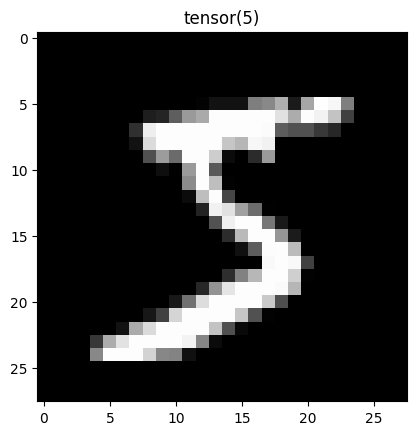

In [42]:
# You can compose a sequence of tranforms using torchvision.transforms module

# Create a transform to be applied to each sample
#   .ToTensor() is critical
transform1 = transforms.Compose([
    transforms.ToTensor(),  # converts PIL image or numpy array (HxWxC) into a 
                            #   torch.FloatTensor (CxHxW), scales it to [0,1] 
    transforms.Normalize(mean=[0.5],std=[0.5]) # for 1 channel
                            #   [0.5,0.5,0.5] for 3 channels
                            # Conversion from RGB to gray could also be useful
                            # Transforms can also be added to the dataloader
    ])

# Download the dataset and set the transform to be applied for each sample
train_data = datasets.MNIST(
    root='./mnist_data/',
    train=True,
    download=True,
    transform = transform1
    )

test_data = datasets.MNIST(
    root='./mnist_data/',
    train=False,
    download=True,
    transform = transform1
    )

print(train_data.data.shape) 
print(train_data.targets.shape)

# Check out a sample
sample_id = 0
image = train_data.data[sample_id]
label = train_data.targets[sample_id]

# Note the shape is (28,28) and dtype is torch.unint8
print(type(image),image.shape, image[20,20]) 
print(type(label),label.shape)

plt.imshow(image, cmap="gray") # .squeeze() if img.shape is (1,28,28)
plt.title(label)


*Dataloader*

torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([1, 28, 28])


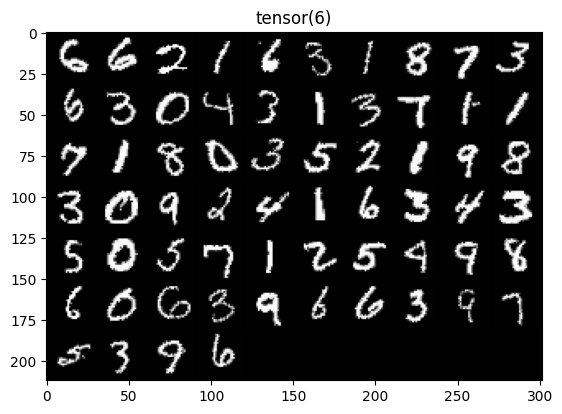

In [43]:
# Create data loaders for train and test datasets

batch_size = 64

train_dataloader = DataLoader(train_data,batch_size,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size,shuffle=False)

# Check out the shape of the loaded data
for X,y in train_dataloader:
  print(X.shape) #batchsize, number of channels, height, width
  print(y.shape) #batchsize
  break # one run of the dataloader

sample_id = 0
image = X[sample_id,:,:,:]
label = y[sample_id]

print(image.shape) # torch.Size([1, 28, 28])

plt.imshow(image.squeeze(), cmap="gray") # we squeeze because shape is (1,28,28)
plt.title(label)

# visualize the batch of the dataset
import torchvision
# X is of size (b,c,h,w)
grid = torchvision.utils.make_grid(X,nrow=10) # grid is a tensor of size (c,h,w)
                                              # nrow: number of imgs in each row
transform_tensor_to_PIL = torchvision.transforms.ToPILImage() 
grid_img = transform_tensor_to_PIL(grid)     # (h,w,c)
plt.imshow(grid_img, cmap="gray")


*Datasets from numpy arrays*

In [51]:
# Let's download a dataset from sklearn
import sklearn
from sklearn.datasets import load_digits
digits = load_digits()

#print(digits.images.shape)  # (1797, 8, 8)
#print(type(digits.images))  # <class 'numpy.ndarray'>

# Let's do train - test split
X = digits.images
y = digits.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.20,
                                                    shuffle=True)

print(X_train.shape, type(X_train))
print(y_train.shape, type(y_train))

# First, transform numpy to tensor
# X_train is of size (batch,h,w). Convert it to (b,c,h,w)
X_train = torch.Tensor(X_train).unsqueeze(1) # unsqueeze for dimensional pos. 1
X_test = torch.Tensor(X_test).unsqueeze(1)

y_train = torch.Tensor(y_train)
y_test = torch.Tensor(y_test)


print(X_train.shape, type(X_train))
print(y_train.shape, type(y_train))


(1437, 8, 8) <class 'numpy.ndarray'>
(1437,) <class 'numpy.ndarray'>
torch.Size([1437, 1, 8, 8]) <class 'torch.Tensor'>
torch.Size([1437]) <class 'torch.Tensor'>


*Create a custom dataset from tensors*

torch.Size([128, 1, 8, 8])
torch.Size([128])
torch.Size([128, 1, 8, 8])
torch.Size([128])


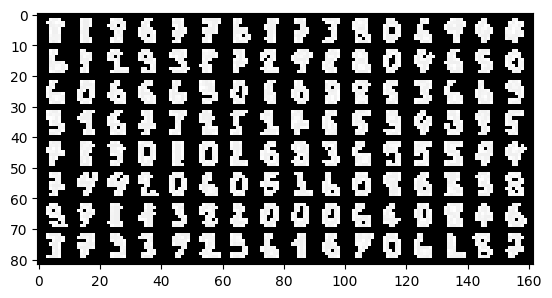

In [52]:
# Use TensorDataset to create a dataset
from torch.utils.data import TensorDataset

# Tensors to dataset
train_data = TensorDataset(X_train,y_train)
test_data = TensorDataset(X_test,y_test)

# Create the dataloaders
train_dataloader = DataLoader(train_data, batch_size=128, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=False)

# Working with a dataloader
for X,y in train_dataloader:
  print(X.shape) #batchsize, number of channels, height, width
  print(y.shape) #batchsize
  break # one run of the dataloader

# Alternatively, ...
X, y = next(iter(train_dataloader))
print(X.shape)
print(y.shape)

# Visualize
grid = torchvision.utils.make_grid(X,nrow=16) # grid is a tensor of size (c,h,w)
                                              # nrow: number of imgs in each row
transform_tensor_to_PIL = transforms.ToPILImage() 
grid_img = transform_tensor_to_PIL(grid)      # (h,w,c)
plt.imshow(grid_img)


*Create a custom dataset from image files*

In [ ]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.io import read_image
from torchvision.transforms import transforms


# For this cell to run, ...
# We need a folder with images
# We need a csv or txt annotation file with image filenames and labels, e.g.:
#   img1.jpg, 0
#   img2.jpg, 0
#   img3.jpg, 1
#   ...

class CustomImageDataset(Dataset):
  def __init__(self,annotation_file,img_dir,transform=None,target_transform=None):
    self.images_labels_df = pd.read_csv(annotation_file, 
                                        header=None, 
                                        names=["Image name", "Label"])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform
  
  def __len__(self):
    return len(self.images_labels_df)
  
  def __getitem__(self,idx):
    #iloc indexed location, 0 is filename, 1 is target label
    img_path = os.path.join(self.img_dir, self.images_labels_df.iloc[idx,0]) 
    image = read_image(img_path) # this produces tensor of size c,h,w
    #If other readers are used, transform w/ transforms.ToTensor()

    # do not forget to convert the label to torch tensor as well
    label = torch.Tensor((self.images_labels_df.iloc[idx,1])) 
    
    if self.transform:
      image = self.transform(image)
    
    if self.target_transform:
      label = self.target_transform(label)

    return image, label


# Let's now check it out

# Directory and annotation file
img_dir = './sample_data/images/'
annotation_file = './sample_data/labels.txt'

# Create the custom dataset
custom_dataset = CustomImageDataset(annotation_file=annotation_file, 
                                    img_dir=img_dir, 
                                    transform=None)  

# Create the dataloader
dataloader = DataLoader(dataset=custom_dataset,batch_size=1)

# Check it out
X, y = next(iter(dataloader))
print(X.shape)
print(y.shape)




torch.Size([1, 3, 2048, 2048])
torch.Size([1])
